# The Social Web Assignment 3: Network Analysis

- Instructors: Jacco van Ossenbruggen, Dayana Spagnuelo
- TAs Michael Accetto, Oktay Kavi, Abhirup Mukherjee, Nihat Uzunalioğlu
- Exercises for Hands-on session 3 (original notebook design by Michael Accetto)

Many interesting data on the Social Web is structured as a graph or network. This notebook will guide you through the use of the networkx library and the construction of a basic network object, made of nodes and edges. After it you will have learned how to measure basic network properties and how to analyse the structure of a network. 

1. Make sure you followed the instructions in the 'GettingStarted.pdf' guide.
2. Activate your virtual environment
3. Install the networkX as by running the following cell. We will also install matplotlib, needed to show the graph created with networkx.

In [1]:
!pip3 install networkx
!pip3 install matplotlib
!pip3 install scipy

## Background
Classic social network analysis studies a network's structure. In a social network, a person is considered a *node* or *vertex*, and a relationship between people is a *link* or *edge*. 
Many network statystics can yield insights on the underlying social structure. At the same time, their intuitive visual representation aids in developing working hypothesis explaining their dynamics.

Statystics can quantify the importance of a social agent and how different communities cluster together.
Others can uncover the routes through which information spreads, as well as the origin of a specific disease or rumor in a group.  

Let's import all the packages needed for the notebook (note: this should run without output):

In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import scipy
import pickle

## Making a graph
In this part, a few simple exemples will be presented to get familiar with the python constructs used throughout the notebook(s).

We will start here by making a graph. Here we use the basic Graph Object to instantiate our graph: `G`. 

In [3]:
G = nx.Graph()

Let's add nodes. We can use `add_node` for a one-off node addition. \
We can also add nodes in bulk with the `add_nodes_from` method, which takes an iterable (e.g. list, tuple, list of dictionaries) as main argument.  

In [4]:
# Add one node:
G.add_node(1)
# Add multiple nodes 2, 3, 4, .. 8:
G.add_nodes_from([i for i in range(2, 9)])

Coding Tip: *If you are not familiar with list comprehensions, such as the following:*   `list = [i for i in range(10)]`

*Please check out this page: https://runestone.academy/runestone/books/published/thinkcspy/Lists/ListComprehensions.html*

In [5]:
# Visualize all graph nodes:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8))

Attributes can be useful for storing data of interest to our research. We will will provide some dummy "score" data  for the moment, just for demonstration purposes. \
Later, we will retrieve real data from external sources.

In [6]:
n = 9

node_info = {'ID': 'user_' + str(9), 'score': 80}

G.add_node(9, **node_info)
# nx.set_node_attributes(G, name='ID', values='user_9')
G.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {'ID': 'user_9', 'score': 80}})

In [7]:
from random import randrange
# create 5 more users, giving them corresponding IDs and random scores.
# this will be used in the following cell to insert information in the graph.
nodes_with_attributes = [(i, {'ID': 'user_' + str(i), 'score': randrange(40, 100)}) for i in range(10, 15)]

print(nodes_with_attributes)

print('\nThis dictionary will provide the following information to the graph:\n')
for node_and_attributes in nodes_with_attributes:
    print(f'node: {node_and_attributes[0]}')
    
    for key, value in node_and_attributes[1].items():
        print(f'\t{key}:\t{value}')

[(10, {'ID': 'user_10', 'score': 62}), (11, {'ID': 'user_11', 'score': 65}), (12, {'ID': 'user_12', 'score': 82}), (13, {'ID': 'user_13', 'score': 56}), (14, {'ID': 'user_14', 'score': 53})]

This dictionary will provide the following information to the graph:

node: 10
	ID:	user_10
	score:	62
node: 11
	ID:	user_11
	score:	65
node: 12
	ID:	user_12
	score:	82
node: 13
	ID:	user_13
	score:	56
node: 14
	ID:	user_14
	score:	53


In [8]:
# add the nodes and attributes:
G.add_nodes_from(nodes_with_attributes)

In [9]:
G.nodes() # show only nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [10]:
G.nodes(data=True) # show everything 

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {'ID': 'user_9', 'score': 80}, 10: {'ID': 'user_10', 'score': 62}, 11: {'ID': 'user_11', 'score': 65}, 12: {'ID': 'user_12', 'score': 82}, 13: {'ID': 'user_13', 'score': 56}, 14: {'ID': 'user_14', 'score': 53}})

In [11]:
for k, v in dict(G.nodes(data=True)).items():
    print(k, v)

1 {}
2 {}
3 {}
4 {}
5 {}
6 {}
7 {}
8 {}
9 {'ID': 'user_9', 'score': 80}
10 {'ID': 'user_10', 'score': 62}
11 {'ID': 'user_11', 'score': 65}
12 {'ID': 'user_12', 'score': 82}
13 {'ID': 'user_13', 'score': 56}
14 {'ID': 'user_14', 'score': 53}


### Task 1.a
There seem to be missing information for some of the nodes in `G`. \

* add those attributes to the incomplete nodes. 
* Add a third attribute of your own choice containing a value of type `string`, `integer` or `float`. \
   Some ideas could be: `favourite_pet`, `number_of_cakes_eaten_on_a_single_day`, or `probability_of_survival`
* At the end, show the complete set of nodes along with their attributes, fetching directly from the graph.

In [12]:
#first we add the information in the empty nodes
nodes_with_attributes_below_9 = [(i, {'ID': 'user_' + str(i), 'score': randrange(40, 100)}) for i in range(1, 9)]
G.add_nodes_from(nodes_with_attributes_below_9)
for k, v in dict(G.nodes(data=True)).items():
    print(k, v)

1 {'ID': 'user_1', 'score': 86}
2 {'ID': 'user_2', 'score': 54}
3 {'ID': 'user_3', 'score': 91}
4 {'ID': 'user_4', 'score': 82}
5 {'ID': 'user_5', 'score': 51}
6 {'ID': 'user_6', 'score': 55}
7 {'ID': 'user_7', 'score': 62}
8 {'ID': 'user_8', 'score': 97}
9 {'ID': 'user_9', 'score': 80}
10 {'ID': 'user_10', 'score': 62}
11 {'ID': 'user_11', 'score': 65}
12 {'ID': 'user_12', 'score': 82}
13 {'ID': 'user_13', 'score': 56}
14 {'ID': 'user_14', 'score': 53}


In [13]:
#now we will add the new attribute favourite_pet
import random

favourite_pet = ['dog','cat','fish','bird', 'reptile', 'rabbit']
favourite_pet_choice = random.choice(favourite_pet)
favourite_pet_nodes = [(i, {'ID': 'user_' + str(i), 'favourite pet': random.choice(favourite_pet)}) for i in range(1, 15)]
G.add_nodes_from(favourite_pet_nodes)
for k, v in dict(G.nodes(data=True)).items():
    print(k, v)

1 {'ID': 'user_1', 'score': 86, 'favourite pet': 'reptile'}
2 {'ID': 'user_2', 'score': 54, 'favourite pet': 'dog'}
3 {'ID': 'user_3', 'score': 91, 'favourite pet': 'bird'}
4 {'ID': 'user_4', 'score': 82, 'favourite pet': 'cat'}
5 {'ID': 'user_5', 'score': 51, 'favourite pet': 'fish'}
6 {'ID': 'user_6', 'score': 55, 'favourite pet': 'bird'}
7 {'ID': 'user_7', 'score': 62, 'favourite pet': 'dog'}
8 {'ID': 'user_8', 'score': 97, 'favourite pet': 'dog'}
9 {'ID': 'user_9', 'score': 80, 'favourite pet': 'reptile'}
10 {'ID': 'user_10', 'score': 62, 'favourite pet': 'cat'}
11 {'ID': 'user_11', 'score': 65, 'favourite pet': 'reptile'}
12 {'ID': 'user_12', 'score': 82, 'favourite pet': 'reptile'}
13 {'ID': 'user_13', 'score': 56, 'favourite pet': 'bird'}
14 {'ID': 'user_14', 'score': 53, 'favourite pet': 'dog'}


## adding edges

The same thing can be done with edges, establishing new relations between vertices (synonym of nodes) in your graph.

In [14]:
G.add_edge(1, 5)

To visualize the graph, we can call the nx.draw_networkx function.

The number of connections present in this graph is: 1


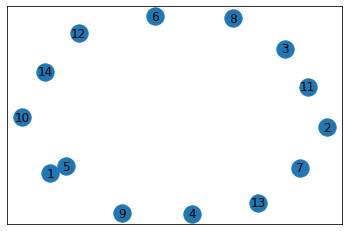

In [15]:
nx.draw_networkx(G)
print(f'The number of connections present in this graph is: {G.number_of_edges()}')

To add more than one edge at the time, we use the "add_edges_from" method. \
We provide an *edge list* or *adjacency list*, listing the pair of nodes that are connected.

In [16]:
# Define a connection from each node N to its neighbour N + 1.
connections = [(n, n+1) for n in range(max(G.nodes()))] 
G.add_edges_from(connections)

In [17]:
G.edges()

EdgeView([(1, 5), (1, 0), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14)])

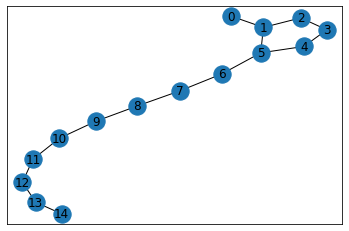

In [18]:
nx.draw_networkx(G)

In [19]:
print(f'number of nodes: {G.number_of_nodes()}')
print(f'number of edges: {G.number_of_edges()}')

number of nodes: 15
number of edges: 15


### Task 1.b

How many nodes and edges does the graph `G` now have?

Make a function taking G as argument, that prints the number of edges and nodes for the provided graph.

(tip: you can use the `count_graph_elements` function we made before).

In [20]:
def count_graph_elements(G):
    # Your code here
    number_of_nodes = {G.number_of_nodes()}
    number_of_edges = {G.number_of_edges()}
    
    print (
        (f'number of nodes : {number_of_nodes}'),
        (f'number of edges : {number_of_edges}'), 
    )
    pass

In [21]:
count_graph_elements(G)

number of nodes : {15} number of edges : {15}


To clear your graph, you can use:

In [22]:
G.clear()

We can verify whether the graph was freed of all its elements by calling `G.nodes()` and `G.edges()` again. \
Or we can define a function that will save us some time in the long run:

In [23]:
count_graph_elements(G)

number of nodes : {0} number of edges : {0}


### A Network of People
We will start now by adding people to our network. 

In [24]:
G.add_edge('Toran', 'Bayta')

In [25]:
print(G.edges())
print(G.nodes()) # nodes are added automatically when edges are added.

[('Toran', 'Bayta')]
['Toran', 'Bayta']


In [26]:
e = [('Milo', 'Yossarian'), ('Toran', 'Mis'), ('Toran', 'Jord')]
G.add_edges_from(e)

As you can see above, nodes don't need to be explicitly defined. 

In [27]:
G.edges()

EdgeView([('Toran', 'Bayta'), ('Toran', 'Mis'), ('Toran', 'Jord'), ('Milo', 'Yossarian')])

### Task 2
Add 10 edges with different people to the graph G. To do so, you can user `add_edges_from`, and provide an iterable as shown above. (an iterable is anything that can be 'looped over', in this case you likely want to use a list of tuples as shown above).

The groups of people to add are: 
 - group 1:
     - Toran
     - Mis
     - Hardin
     - Mallow
     - Hari
     - Jord
     - Lathan
 - group 2:
     - Milo
     - Yossarian
     - Orr
     - Nately
     - Dobbs
     - Duckett
     
Make sure that people in the first group are not connected to the second group. Also make sure that each person in one group is connected to at least one other person within the same group. 
Lastly, ensure the 2 groups are connected (there is no graph 'island').

In [28]:
# Your code here:
edges_group_1 = [('Toran', 'Mis'), ('Toran', 'Hardin'), ('Toran', 'Hari'), ('Toran', 'Jord'), ('Toran', 'Lathan')]
edges_group_2 = [('Milo', 'Yossarian'), ('Milo', 'Orr'), ('Milo', 'Nately'), ('Milo', 'Dobbs'), ('Milo', 'Duckett')]
edges_group_1_and_2 = [('Toran', 'Milo')]

In [29]:
# adding the groups
# your code here (unanswered)
G.clear()
G.add_edges_from(edges_group_1)
G.add_edges_from(edges_group_2)
G.add_edges_from(edges_group_1_and_2)

In [30]:
G.edges()

EdgeView([('Toran', 'Mis'), ('Toran', 'Hardin'), ('Toran', 'Hari'), ('Toran', 'Jord'), ('Toran', 'Lathan'), ('Toran', 'Milo'), ('Milo', 'Yossarian'), ('Milo', 'Orr'), ('Milo', 'Nately'), ('Milo', 'Dobbs'), ('Milo', 'Duckett')])

Let's visualize the state of the graph:

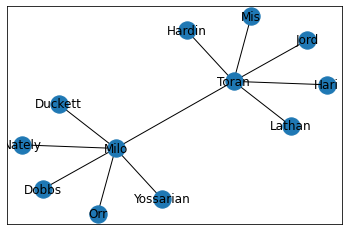

In [31]:
nx.spring_layout(G)
nx.draw_networkx(G)

### Edge attributes
Edges can also have attributes. One important attribute is 'weight', we can add weight to the graphs with the same syntax we used to add a normal edge.

We can add a weight to an edge by providing the argument `weight` to the function `add_edge`:

In [32]:
G.add_edge('Milo', 'Hari', weight=0.1)

More conveniently, we can use the `add_edges_from` method to add a collection of edges and attributes.
Any attribute can be provided as a dictionary in a format such as:
    
    [
     (edge_1a, edge_1b, {'attribute_name': 'value_1a}),
     (edge_2a, edge_2b, {'attribute_name': 'value_2a}),
     ...
     (edge_Na, edge_Nb, {'attribute_name': 'value_Na})
    ]

In [33]:
from random import random
# for now, we add random weights normalized in range [0.3, 1.0]
weighted_edges = [(p1, p2, {'weight': round((random() + .5) / 1.5, 1)}) for w, (p1, p2) in enumerate(G.edges())]
G.add_edges_from(weighted_edges)

In [34]:
G.edges(data=True) # by using data=True, we can visualize edge attributes.

EdgeDataView([('Toran', 'Mis', {'weight': 0.6}), ('Toran', 'Hardin', {'weight': 0.7}), ('Toran', 'Hari', {'weight': 0.8}), ('Toran', 'Jord', {'weight': 0.7}), ('Toran', 'Lathan', {'weight': 0.4}), ('Toran', 'Milo', {'weight': 0.8}), ('Hari', 'Milo', {'weight': 0.5}), ('Milo', 'Yossarian', {'weight': 0.9}), ('Milo', 'Orr', {'weight': 0.6}), ('Milo', 'Nately', {'weight': 0.5}), ('Milo', 'Dobbs', {'weight': 0.5}), ('Milo', 'Duckett', {'weight': 0.6})])

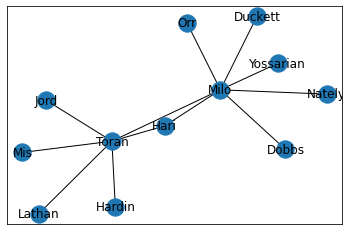

In [35]:
nx.draw_networkx(G)

### visualizing the information
In order to create more informative visualizations, there are slightly more advanced techniques.

By iterating through the edges attributes, we can directly represent weights and other information in our graph.

In [36]:
# comprehension list: loop over edges, separating them in two subset (lower vs. greater or equal 0.5)
edges_L = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
edges_S = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

Here we will use one layout to plot vertices and edges separately.

The layout function `spring_layout` returns positions for each node present in the network. 

In this way we will be able to plot different components of the network separately, providing more control on various characteristics we may want to represent.



In [37]:

pos = nx.spring_layout(G) # obtain edges pos(ition)
print('Graph nodes coordinates')
print(pos)

Graph nodes coordinates
{'Toran': array([-0.40511548,  0.08701245]), 'Mis': array([-0.94330142, -0.00651449]), 'Hardin': array([-0.68226226, -0.32030467]), 'Hari': array([-0.06641733,  0.08051483]), 'Jord': array([-0.54253004,  0.55694706]), 'Lathan': array([-1.        ,  0.44917428]), 'Milo': array([ 0.34296915, -0.06518095]), 'Yossarian': array([0.48935326, 0.33144503]), 'Orr': array([0.8429636 , 0.21059841]), 'Nately': array([ 0.94749014, -0.19172555]), 'Dobbs': array([ 0.71642614, -0.54873931]), 'Duckett': array([ 0.30042423, -0.5832271 ])}


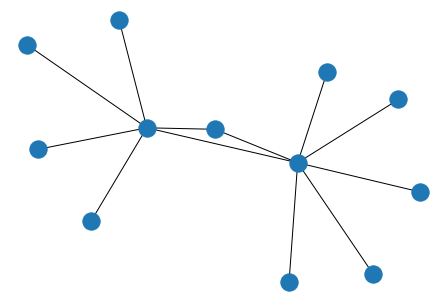

In [38]:
# Drawing the graph in the traditional way only provides connectivity topology:
nx.draw(G, pos)

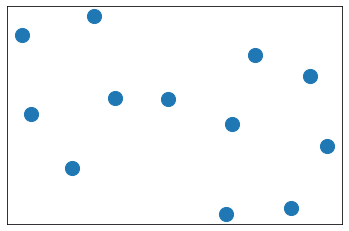

In [39]:
nx.draw_networkx_nodes(G, pos, node_size=200)

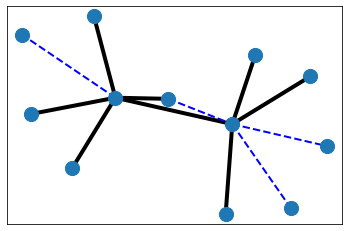

In [40]:
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=edges_L, width=4)
nx.draw_networkx_edges(
    G, pos, edgelist=edges_S, width=2, edge_color="b", style="dashed"
)

Something seems off with this plot. The plot has axes ranging values [0, 1], while our positions occur beyond the provided window.
To fix this, we can instantiate provide axes to the draw_network_element functions:

In [41]:
{k: (u, v) for k, (u, v) in pos.items()}

{'Toran': (-0.40511547850620366, 0.08701245424558861),
 'Mis': (-0.9433014242031593, -0.006514492270654688),
 'Hardin': (-0.6822622623631975, -0.3203046700815442),
 'Hari': (-0.06641733060173453, 0.0805148258912294),
 'Jord': (-0.5425300431117036, 0.556947064733737),
 'Lathan': (-1.0, 0.4491742813473001),
 'Milo': (0.342969150037659, -0.06518094943209826),
 'Yossarian': (0.4893532648133656, 0.3314450274485461),
 'Orr': (0.8429636006899865, 0.2105984085302959),
 'Nately': (0.9474901442555564, -0.19172554606555078),
 'Dobbs': (0.7164261449318536, -0.5487393075392056),
 'Duckett': (0.30042423405757746, -0.5832270968076442)}

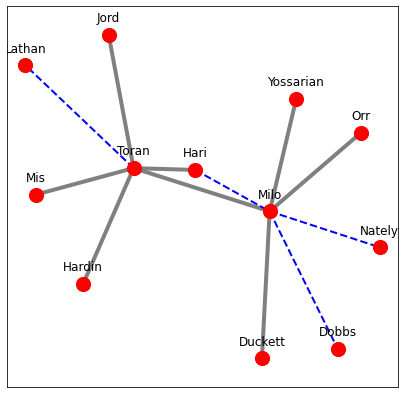

In [42]:


# instantiate pyplot axis to plot everything (internally used by all the `nx.draw...` functions)
fig, ax = plt.subplots(figsize=(7, 7))

nx.draw_networkx_nodes(G, pos, node_size=200, node_color='red')
nx.draw_networkx_edges(G, pos, edgelist=edges_L, width=4, edge_color='grey')
nx.draw_networkx_edges(
    G, pos, edgelist=edges_S, width=2, edge_color="b", style="dashed"
)
label_offset = 0.06 # we insert the label for each node slightly above it.
nx.draw_networkx_labels(G, {k: (u, v + label_offset) for k, (u, v) in pos.items()}) # dictionary comprehension expression

## centre plot, leave margin around the graph


xs = [p[0] for p in pos.values()] # extract all x...
ys = [p[1] for p in pos.values()] # ...and y values from edges positions

margin = 0.1
ax.set_xlim((min(xs) - 0.1, max(xs) + 0.1))
ax.set_ylim((min(ys) - 0.1, max(ys) + 0.1))
plt.show()


### Task 3
Can you make a function plotting a given graph, exhibiting like thickness *proportional to the weight* attribute of each edge?

To do so you will need to:

0. Take G, label_offset and show_edge_attributes as arguments of your function
1. Instantiate pyplot figure and axis with `plt.subplots()`
3. obtain nodes position via `nx.spring_layout(G)`
3. Show nodes with `nx.draw_networkx_nodes(G, pos, node_size=..., node_color=...)`
4. Show edges by:
     1. getting all (scaled) weights by: `[d['weight']*scaling_factor for (u, v, d) in graph.edges(data=True)]` \
        where scaling_factor is an arbitrarily chosen integer to make the difference in weights visible.
     2. call the function below: 
             nx.draw_networkx_edges(G, pos, edge_list=G.edges(), width=weights, edge_color=...)
         by providing the array `weights` as width argument.
      
      
5. For each node, show its name above it, calling `draw_networkx_labels` with an offset to the y coordinate. 
6. add the option to display edge attributes with `nx.draw_networkx_edge_label`. \
    i. Make this dependent on an argument: (`if show_edge_attributes:`). \
    ii. create the adjacency list to show only the weight with:
        edge_labels = {(u, v): d['weight'] for (u, v, d) in G.edges(data=True)}
    iii. Then:
        nx.draw_networkx_edge_labels(G, pos, edge_labels)
7. increase graph margins by: \
    i. obtaining x and y coordinates for each item in `pos` \
    ii. set xlim and ylim accordingly

Of the points here outlined, 6. is the only task not shown previously in this notebook. The workings of `nx.draw_networkx_edge_labels`, however, are similar to `draw_networkx_labels`. More information can be found [reading the docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html).

In [43]:
def show_graph(G, label_offset=0.5, plot_margin=0.1, show_edge_attribute=True):
    # Your code here
    
    fig, ax = plt.subplots(figsize=(7, 7))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='red')
    scaling_factor = randrange(2, 5)
    
    weights = [d['weight']*scaling_factor for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights, edge_color='grey')
    nx.draw_networkx_labels(G, {k: (u, v + label_offset) for k, (u, v) in pos.items()})
    
    edge_labels = {(u, v): d['weight'] for (u, v, d) in G.edges(data=True)}
    if show_edge_attribute:
        nx.draw_networkx_edge_labels(G, pos, edge_labels)
        
    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]

    margin = 0.1
    ax.set_xlim((min(xs) - 0.2, max(xs) + 0.2))
    ax.set_ylim((min(ys) - 0.2, max(ys) + 0.2))
    plt.show()
        
    pass

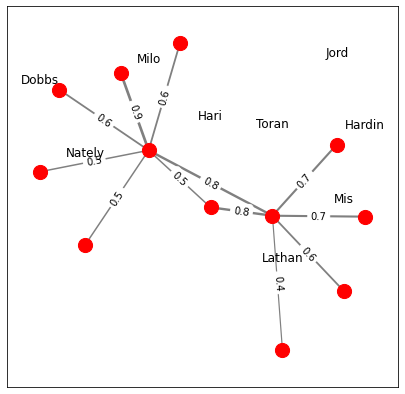

In [44]:
show_graph(G)

In [45]:
count_graph_elements(G)

number of nodes : {12} number of edges : {12}


## Time for Data

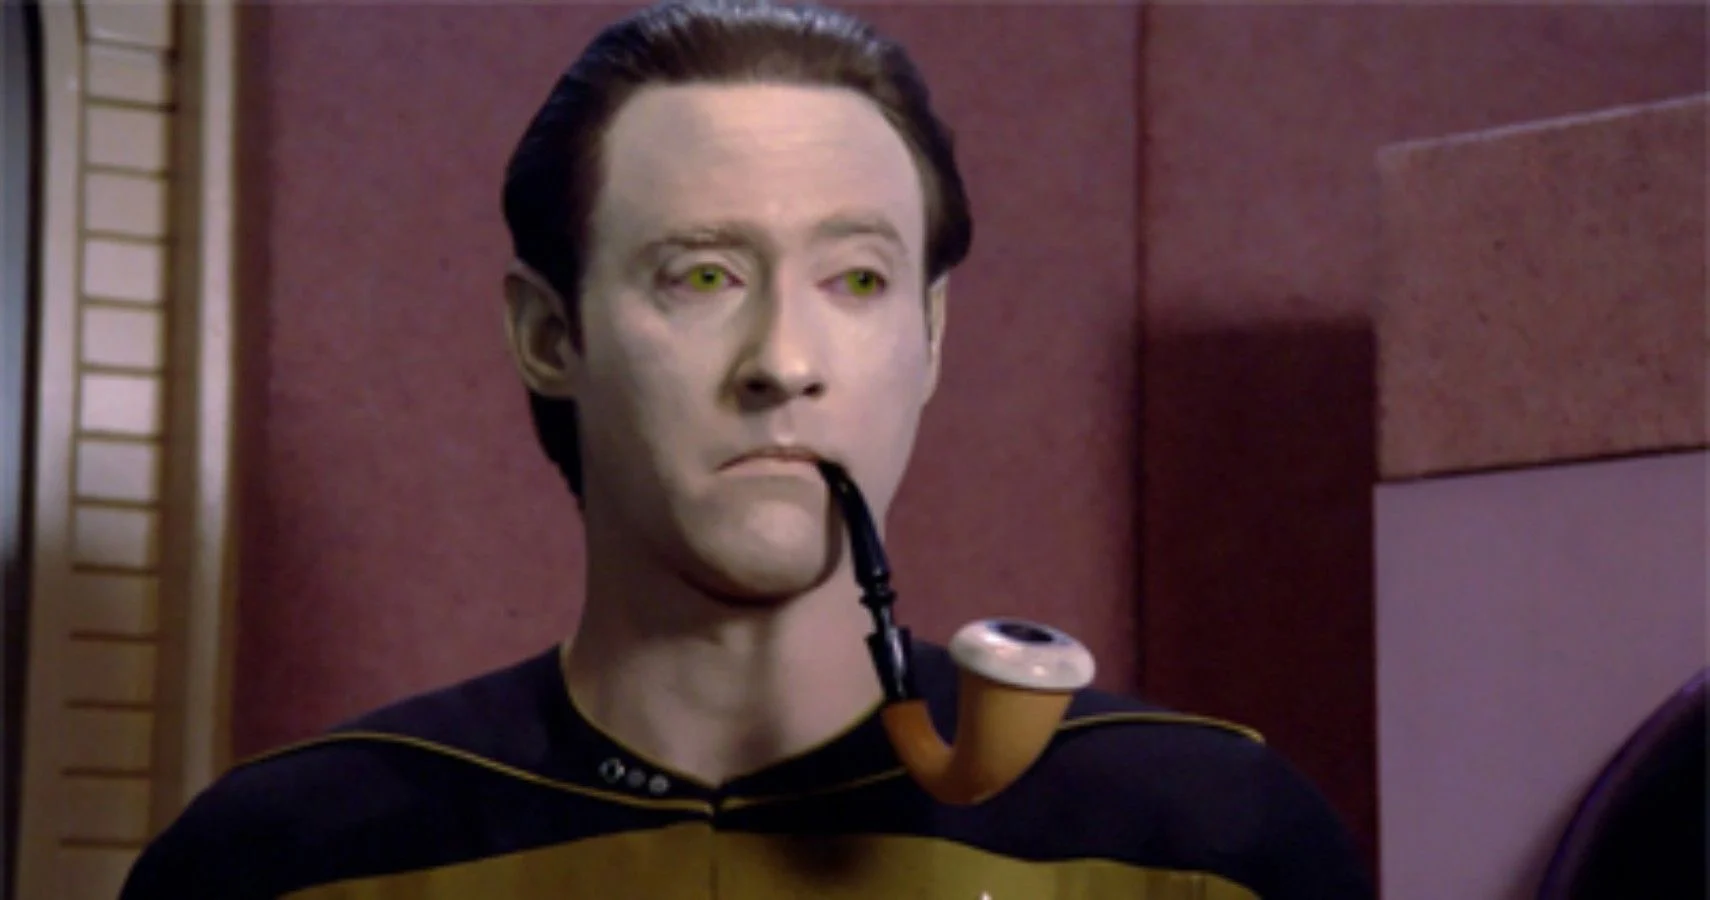 </img>

We will now show how to apply this graphing techniques to real world data, building a network to gain an understanding of the underlying social dynamics.

### Task 4
1. Download [Stanford's example facebook network data](https://snap.stanford.edu/data/egonets-Facebook.html).
2. Extract the archive file named `facebook.tar.gz`.  
    * on Linux or Mac:
        1. `Ctrl+Alt+T`;
        2.  `tar -xvzf /path/to/file.tar.gz`.
      
    * on Windows (just use [7zip](https://www.7-zip.org/)).
2. replace the variable filename with the relative or absolute path of the file named "`0.edges`". 

In [46]:
# Your code here
edges_filename = 'facebook/0.edges'
G_fb = nx.read_edgelist(edges_filename, nodetype=int)

In [47]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 333
Number of edges: 2519
Average degree:  15.1291


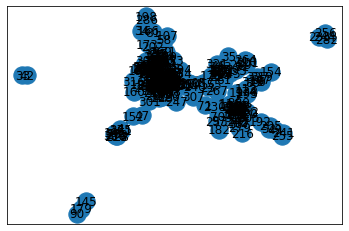

In [48]:
nx.draw_networkx(G_fb)

### Connectedness
Is this graph connected? Why?

In [49]:
# to answer the question above, we can use the functions provided by networkx:
if nx.is_connected(G_fb):
    print("the graph is connected")
    print(f'because there is only {nx.connected_components(G_fb)} ')
else:
    print("the graph is not connected")
    print(f'because there are n {len([c for c in nx.connected_components(G_fb)])} separate components.')

the graph is not connected
because there are n 5 separate components.


There seem to be a few components disconnected to the whole.

Let's extract the greatest component and define a stand-alone network from it.

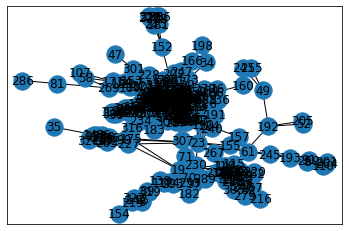

In [50]:
# return connected components
components = nx.connected_components(G_fb)
# find the largest, sorting by size (len)
largest_comp = max(components, key=len)
# obtain subgraph `sG` from `G_fb`
sG = G_fb.subgraph(largest_comp)
# quickly visualize
nx.draw_networkx(sG)

### Manipulating graph attributes: adding, saving, loading and visualizing attribute data

Often you want to be able to associate a specific attribute to all the nodes or edges in your graph. Make sure you understand the example code below. Here, we use a random nuber generator to generate the values for an example `weight` attribute for all edges in our graph. We than use the pickle package to write down the resulting data structure, so we may quickly load it back from disk when needed later (or to use it in the notebook of your group members!). We then add the new weight attribute values to the edges of the graph and vizualize the result: 


In [51]:
# generate random weights for all edges:
adj_d = {(u, v): {'weight': round((random() + .05)/1.05, 2)} for (u, v) in sG.edges()}

# save to disk:
with open('weights.pkl', 'wb') as f:
    pickle.dump(adj_d, f)

# load from disk 
with open('weights.pkl', 'rb') as f:
    adjacency_dictionary_with_attributes = pickle.load(f)

In [52]:
nx.set_edge_attributes(sG, values = adjacency_dictionary_with_attributes)

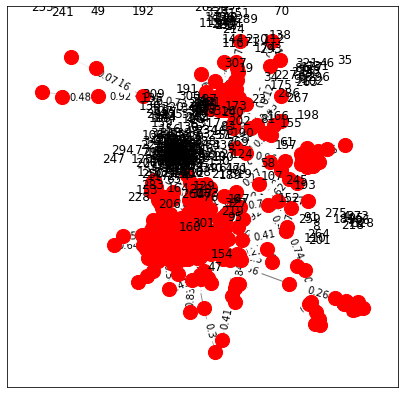

In [53]:
show_graph(sG)

## Measures of graph centrality / eccentricity

### Degree & degree centrality

The total number of edges of a node is known as its **degree**. A node with a realtive high degree can be seen as playing a more *central* role in the graph and is said to have a high **degree centrality**. 

For networks with directed edges, it is common to count incoming edges (indegree) and outgoing (outdegree) edges seperately. For example, on twitter, a node with a high indegree corresponds to an account with many followers, while a node with a high outdegree represents an account that follows many others. Note that direclty interpreting these numbers as properties of the account owners in the real world maybe dangerous (e.g. "Alice is more popular person than Bob because of her higher indegree" or "Bob has a high outdegree, typically someone who is afraid to be alone")

On facebook, the friend relation is not directed so we focus just on the degree metric in the examples below.

To make it easy to use degrees in your data analysis, it is often handy to pre-compute the degrees and make the results an explicit attribute of each node. For example: 

In [54]:
# find the degree of each node
degree_dict = dict(sG.degree(sG.nodes()))
# add the attribute 'degree' to the respective node.
nx.set_node_attributes(sG, degree_dict, 'degree')

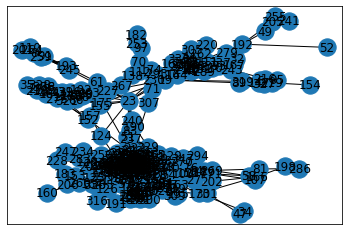

In [55]:
nx.draw_networkx(sG)

In [56]:
sG.nodes(data=True)

NodeDataView({236: {'degree': 36}, 186: {'degree': 43}, 122: {'degree': 62}, 285: {'degree': 46}, 24: {'degree': 15}, 346: {'degree': 26}, 271: {'degree': 72}, 304: {'degree': 54}, 176: {'degree': 13}, 9: {'degree': 56}, 130: {'degree': 15}, 329: {'degree': 29}, 204: {'degree': 21}, 213: {'degree': 38}, 252: {'degree': 64}, 332: {'degree': 42}, 82: {'degree': 33}, 65: {'degree': 11}, 276: {'degree': 17}, 26: {'degree': 67}, 280: {'degree': 42}, 272: {'degree': 44}, 211: {'degree': 29}, 199: {'degree': 46}, 84: {'degree': 12}, 133: {'degree': 17}, 62: {'degree': 25}, 239: {'degree': 58}, 172: {'degree': 40}, 322: {'degree': 71}, 53: {'degree': 30}, 3: {'degree': 16}, 170: {'degree': 45}, 175: {'degree': 16}, 46: {'degree': 4}, 56: {'degree': 77}, 254: {'degree': 16}, 194: {'degree': 18}, 231: {'degree': 20}, 117: {'degree': 5}, 127: {'degree': 15}, 135: {'degree': 9}, 103: {'degree': 15}, 188: {'degree': 47}, 23: {'degree': 16}, 116: {'degree': 16}, 73: {'degree': 9}, 299: {'degree': 19

In [57]:
node_color = []
    
for k,v in degree_dict.items():

    # if the node has the attribute group1
    if 1 <= v <= 10:
        node_color.append('blue')

    # if the node has the attribute group1
    elif 11 <= v <= 20:
        node_color.append('red')
    
    # if the node has the attribute group1
    elif 21 <= v <= 30:
        node_color.append('green')

    # if the node has the attribute group1
    elif 31 <= v <= 40:
        node_color.append('yellow')

    # if the node has the attribute group1
    elif 41 <= v <= 50:
        node_color.append('orange')
        
print(node_color)

['yellow', 'orange', 'orange', 'red', 'green', 'red', 'red', 'green', 'green', 'yellow', 'orange', 'yellow', 'red', 'red', 'orange', 'orange', 'green', 'orange', 'red', 'red', 'green', 'yellow', 'green', 'red', 'orange', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'orange', 'red', 'red', 'blue', 'red', 'blue', 'yellow', 'green', 'red', 'orange', 'yellow', 'blue', 'blue', 'yellow', 'yellow', 'red', 'blue', 'blue', 'blue', 'green', 'red', 'red', 'green', 'red', 'red', 'yellow', 'blue', 'blue', 'blue', 'red', 'green', 'green', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'blue', 'red', 'blue', 'green', 'blue', 'red', 'blue', 'blue', 'blue', 'yellow', 'yellow', 'orange', 'red', 'green', 'blue', 'blue', 'red', 'blue', 'green', 'yellow', 'blue', 'red', 'red', 'red', 'yellow', 'blue', 'blue', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'red', 'green', 'gr

### Task 5

Can you create a variant of the above function `show_graph` named '`show_graph_node_degrees`'

This time:

1. Don't show node names
2. Color-code each node by looking at its 'degree' attribute. 

Tips:

1. You can obtain the 'degree' attribute for each node similarly to what was done before for 'weights' of each node. Namely, using a comprehension list while indexing the desired attribute, and then providing the resulting array to the `draw_networkx_nodes` function as 'node_color' argument. 
2. Make nodes smaller to be able to see all the nodes (even in the most crowded clusters).

In [58]:
def show_graph_node_degrees(graph, label_offset=0.08, plot_margin=0.5, show_edge_attribute=True):
    # Your code here
    
    fig, ax = plt.subplots(figsize=(7, 7))
    pos = nx.spring_layout(sG)
    
    scaling_factor = randrange(2, 5)
    
    node_color = []
    
    for k,v in degree_dict.items():

    # if the node has the attribute group1
        if 1 <= v <= 10:
            node_color.append('blue')

    # if the node has the attribute group1
        elif 11 <= v <= 20:
            node_color.append('red')
    
    # if the node has the attribute group1
        elif 21 <= v <= 30:
            node_color.append('green')

    # if the node has the attribute group1
        elif 31 <= v <= 40:
            node_color.append('yellow')

    # if the node has the attribute group1
        elif 41 <= v <= 50:
            node_color.append('orange')
            
    # if the node has the attribute group1
        elif v >= 51:
            node_color.append('purple')
    
    nx.draw_networkx_nodes(sG, pos, node_size=10, node_color=node_color)
    weights = [d['weight']*scaling_factor for (u, v, d) in sG.edges(data=True)]
    
    nx.draw_networkx_edges(sG, pos, edgelist=sG.edges(), width=weights, edge_color='grey')
    
    edge_labels = {(u, v): d['weight'] for (u, v, d) in sG.edges(data=True)}
    if show_edge_attribute:
        nx.draw_networkx_edge_labels(sG, pos, edge_labels)
        
    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]

    margin = 0.1
    ax.set_xlim((min(xs) - 0.2, max(xs) + 0.2))
    ax.set_ylim((min(ys) - 0.2, max(ys) + 0.2))
    plt.show()
        
    
    pass

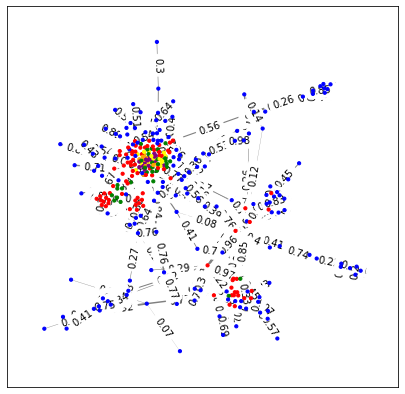

In [59]:
show_graph_node_degrees(sG)

### Centrality measures

Degree centrality is not the only metric related to centrality. Another intuitively common intepretation of centrality is that a central node is relatively close to most other nodes in the network. **Closeness centrality**  of a node is (the reciprocal of) the average length of the shortest path between the node and all other nodes in the network. Note that central nodes have shorter paths, so to make sure that lower averages result in higher centrality, often the reciprocal of the average is used i.s.o. the average itself. 

Yet another notion of centrality, ofent used in social network analysis, is the intuition that more central nodes often play the role of being the *bridge* between two other nodes, e.g. they are more often on the shortest path that connects other pairs. The number of times a node is on the shortest path relative to the total number of shortest paths is knowns as the **betweeness centrality**. 

Another metric you may find in the literature is **eigenvector centrality**, which is centered around the idea that the *influence* of a node in the network increases if it influences other nodes with a high eigenvector centrality. This metric is closely related to metrics such as Pagerank. 

There are, however, many more notions of centrality. Which one is *best* depends on your research question and data used. You are recommended to explore the other centrality metrics available in the [networkx library](https://networkx.org/documentation/stable/reference/algorithms/centrality.html).

### Task 6

To each node, add the attributes: 

- betweenness centrality (`nx.betweenness_centrality(graph_object)`)
- eigenvector centrality (`nx.eigenvector_centrality(graph_object)`)
- closeness centrality (`nx.closeness_centrality(g_o)`)

In [63]:
# For instance:

## find the between centrality of each node
between_centrality = nx.betweenness_centrality(sG)
## add the attribute 'betweenness' to the respective node.
nx.set_node_attributes(sG, between_centrality, 'betweenness')

In [64]:
## find the between centrality of each node
eigen_centrality = nx.eigenvector_centrality(sG)
## add the attribute 'betweenness' to the respective node.
nx.set_node_attributes(sG, eigen_centrality, 'eigenvector')

In [65]:
## find the between centrality of each node
close_centrality = nx.closeness_centrality(sG)
## add the attribute 'betweenness' to the respective node.
nx.set_node_attributes(sG, close_centrality, 'closeness')

In [136]:
for k, v in dict(sG.nodes(data=True)).items():
   print(k, v)


236 {'degree': 36, 'betweenness': 0.0038488280905233487, 'eigenvector': 0.0922636129694123, 'closeness': 0.33026584867075665}
186 {'degree': 43, 'betweenness': 0.0058255090238398454, 'eigenvector': 0.12859744691394331, 'closeness': 0.35533553355335534}
122 {'degree': 62, 'betweenness': 0.02404165626812305, 'eigenvector': 0.16501410774030684, 'closeness': 0.3729792147806005}
285 {'degree': 46, 'betweenness': 0.014464798403245582, 'eigenvector': 0.1302468716154604, 'closeness': 0.3649717514124294}
24 {'degree': 15, 'betweenness': 0.0001135084704237976, 'eigenvector': 0.0034490485220847566, 'closeness': 0.2687188019966722}
346 {'degree': 26, 'betweenness': 0.004916553482717634, 'eigenvector': 0.009059554590593905, 'closeness': 0.29204339963833637}
271 {'degree': 72, 'betweenness': 0.015821814825480465, 'eigenvector': 0.1936784300298836, 'closeness': 0.3786635404454865}
304 {'degree': 54, 'betweenness': 0.014315171862033552, 'eigenvector': 0.14502793408853468, 'closeness': 0.36956521739130

### Task 7
Write a function akin to show_graph_node_degree called `show_graph_node_centrality` taking an argument (among others) called 'centrality_measure'. 

Plot the graph by color-coding each node with the desired centrality measure. 

In [153]:
def show_graph_node_centrality(graph, centrality_measure, show_edge_attribute=True):
    
    if centrality_measure not in ['betweenness', 'eigenvector', 'degree', 'closeness']:
        raise ValueError

    fig, ax = plt.subplots(figsize=(7, 7))
    pos = nx.spring_layout(sG)
    
    scaling_factor = randrange(2, 5)
    
    node_color = []
    
    for k,v in dict(sG.nodes(data=True)).items():

    # if the node has the attribute group1
        if centrality_measure == 'betweenness':
            node_color.append('orange')
            
        if centrality_measure == 'closeness':
            node_color.append('red')
            
        if centrality_measure == 'eigenvector':
            node_color.append('yellow')
            
        if centrality_measure == 'degree':
            node_color.append('purple')



    

    
    
    
    nx.draw_networkx_nodes(sG, pos, node_size=10, node_color=node_color)
    weights = [d['weight']*scaling_factor for (u, v, d) in sG.edges(data=True)]
    
    nx.draw_networkx_edges(sG, pos, edgelist=sG.edges(), width=weights, edge_color='grey')
    
    edge_labels = {(u, v): d['weight'] for (u, v, d) in sG.edges(data=True)}
    if show_edge_attribute:
        nx.draw_networkx_edge_labels(sG, pos, edge_labels)
        
    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]

    margin = 0.1
    ax.set_xlim((min(xs) - 0.2, max(xs) + 0.2))
    ax.set_ylim((min(ys) - 0.2, max(ys) + 0.2))
    plt.show()
        
    
    pass

    
    # Repeat the usual steps, but consider user input for 'centrality_measure' to color-code each node. 

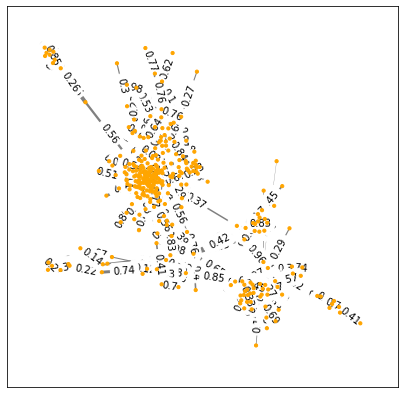

In [155]:
show_graph_node_centrality(sG, 'betweenness')

### Question
What is the difference the presented centrality measures? Discuss the tradeoff between computational complexity and usefulness of each.